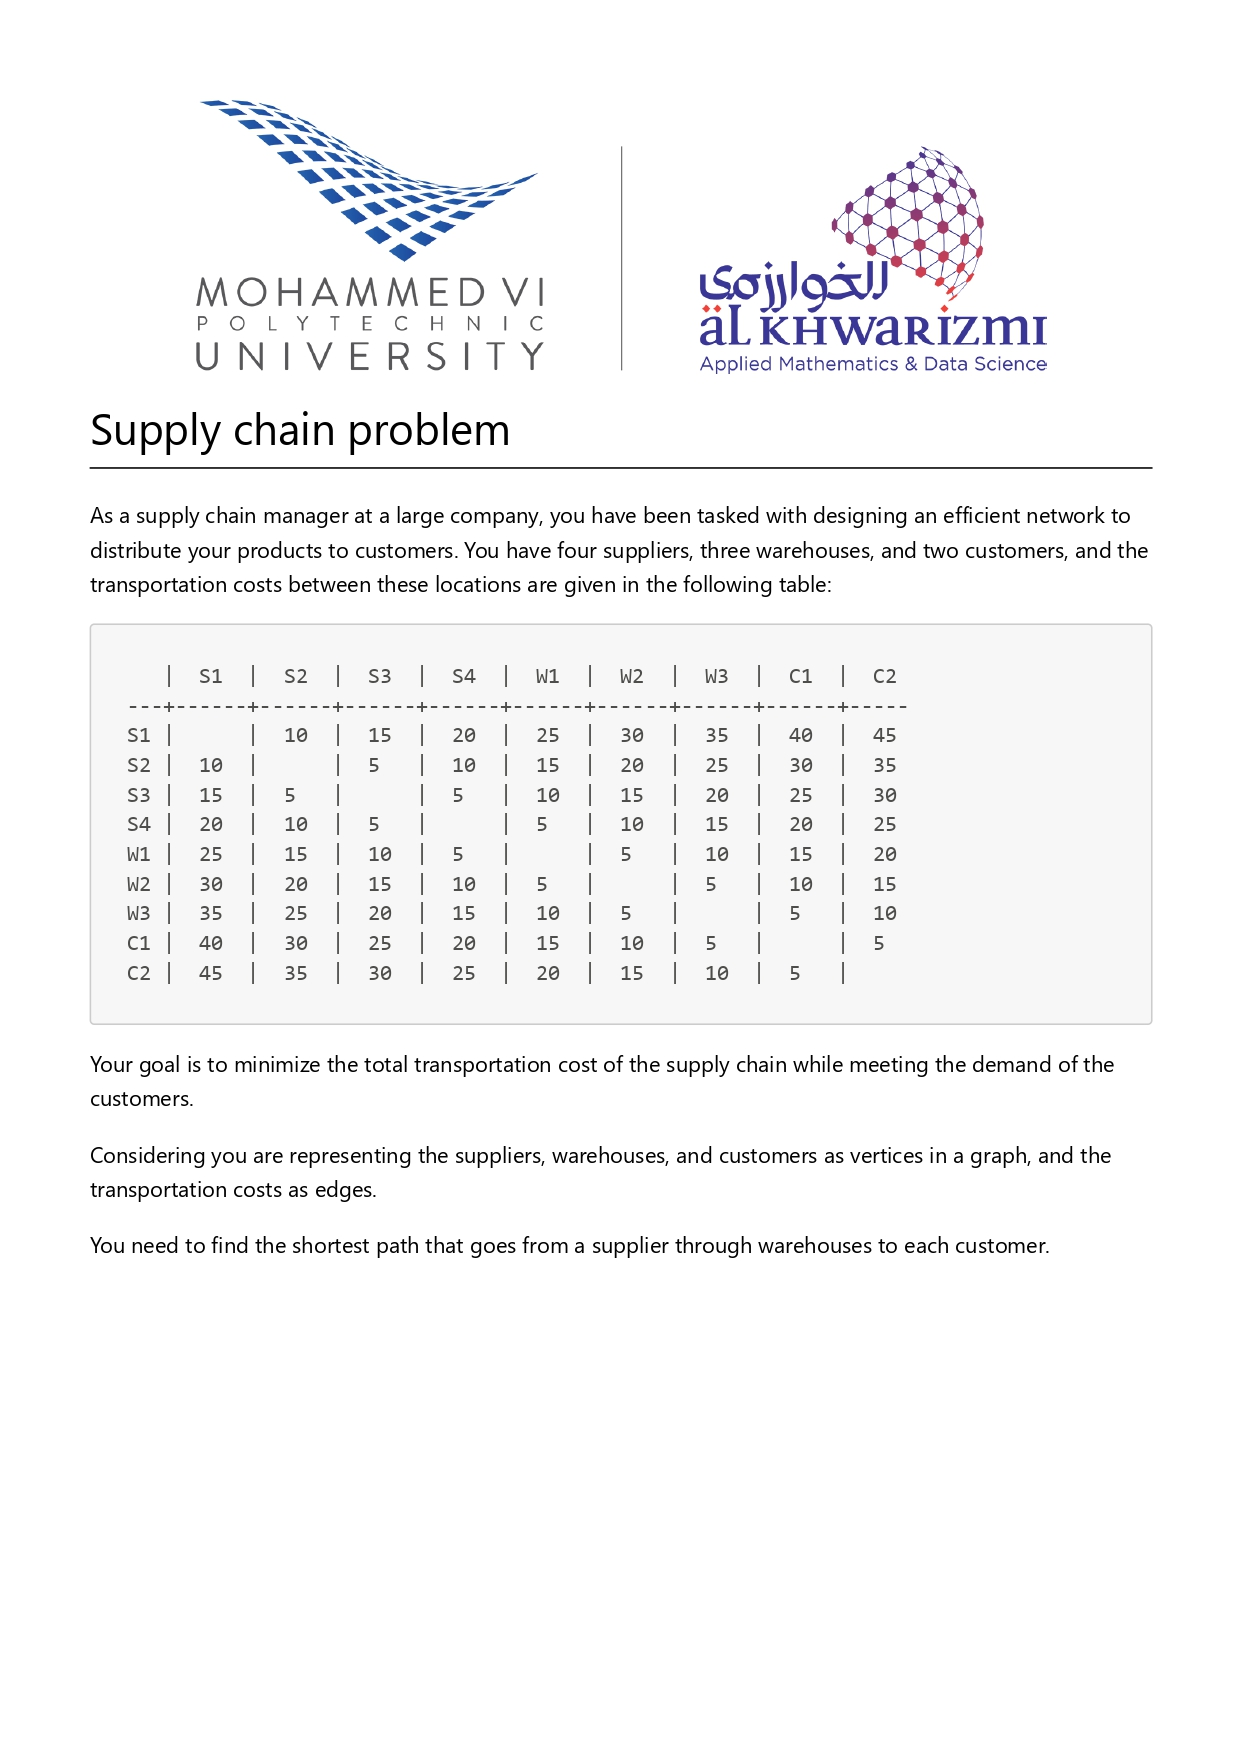

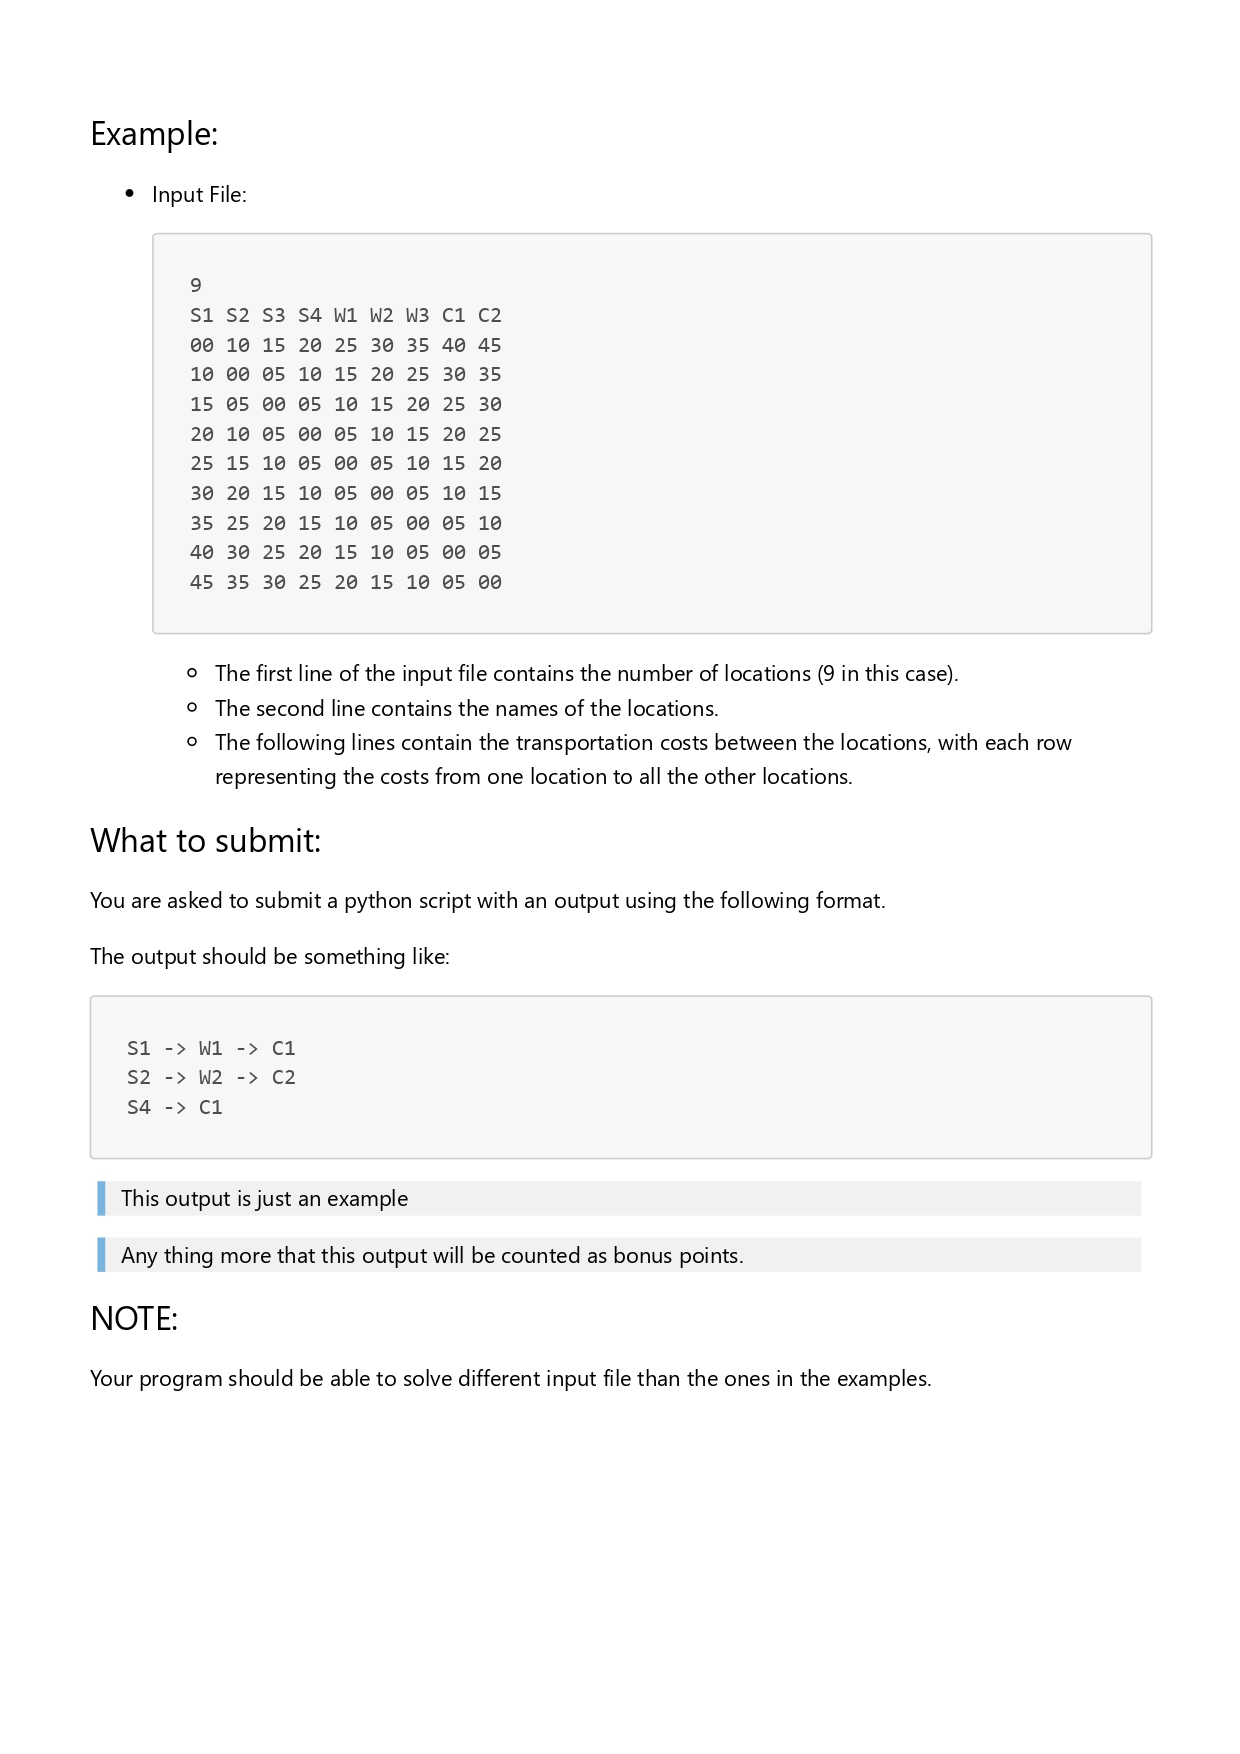

In [152]:
import pandas as pd
import numpy as np
graph={}
tab = pd.read_csv("/home/lancien/Projet/SupplyChain.csv",skiprows=1)
mat=tab.values
val_max=np.max(mat)
val_min=np.min(mat)
for i in range (9):
    for j in range (9):
        if mat[i,j]!=0:
            a=tab.keys()[i]
            b=tab.keys()[j]
            if a[0]!=b[0] and j>i:
                graph[(a,b)]=mat[i,j]
def short_path1(graph,end):
    list1=[]
    list2=[]
    for i in graph.keys():
        if i[-1]==end:
            list1.append(graph[i])
    for j in graph.keys():
        if j[-1]==end and graph[j]==min(list1):
            path1=j
    return path1
def short_path2(graph,start):
    list1=[]
    list2=[]
    for i in graph.keys():
        if i[0]==start:
            list1.append(graph[i])
    for j in graph.keys():
        if j[0]==start and graph[j]==min(list1):
            path2=j
    return path2
list_1=[]
for i in ("C1","C2"):
    a=short_path1(graph,i)
    b=short_path1(graph,a[0])
    list_1.append((b,a))
    print(b[0],"->",b[1],"->",a[1])
list_2=[]
for j in ("S1","S2","S3","S4"):
    c=short_path2(graph,j)
    d=short_path2(graph,c[-1])
    list_2.append((c,d))
    print(c[0],"->",c[1],"->",d[1])

S4 -> W3 -> C1
S4 -> W3 -> C2
S1 -> W1 -> C1
S2 -> W1 -> C1
S3 -> W1 -> C1
S4 -> W1 -> C1


In [ ]:
### Récuperation et transformation du fichier csv en dataframe et en matrice
import pandas as pd
import numpy as np
graph={}
tab = pd.read_csv("/home/lancien/Projet/SupplyChain1.csv",skiprows=1)
mat=tab.values

#Creation d'une graphe orienté de supplier vers constumer, de supplier vers warehouse et de warehouse vers costumer.
for i in range (9):
    for j in range (9):
        if mat[i,j]!=0:
            a=tab.keys()[i]
            b=tab.keys()[j]
            if a[0]!=b[0] and j>i:
                graph[(a,b)]=mat[i,j]
                
#Création de la liste des chemins possibles.
path=[]
for i in graph.keys():
    for j in graph.keys():
        if j[0]==i[-1]:
            path.append((i,j))
            
#Creation d'une fonction pour sortir le chemin menant vers un costumers en passant par un warehouse
def path_to_costumer(path,costumer):
    liste=[]
    for x in path:
        for y in x[-1]:
            if y==costumer:
                liste.append(x)
    return liste    
path1_to_C1=path_to_costumer(path,"C1")          
path1_to_C2=path_to_costumer(path,"C2")

#Création d'une fonction qui va trouver le chemin le plus court vers un costumer
def find_shortest_path(graph,path_to_costumer):
    cost=[]
    for i in path_to_costumer:
        cost.append(graph[i[0]]+graph[i[-1]])
    for j in path_to_costumer:
        if graph[j[0]]+graph[j[-1]]==min(cost):
            a=j[0]
            b=j[-1]
    print(a[0],"->",b[0],"->",b[-1])
    
#Afficher le chemin le moins couteux de supplier vers les costumers en passant par un warehouse
print("Les chemins les moins couteux vers les clients sont: ")
for i in (path1_to_C1,path1_to_C2):
    print(find_shortest_path(graph,i))
    
#Création de le liste des chemins possible de supplier vers costumer directement
#sup=[]
#for i in graph.keys():
#    for j in i:
#        if j[0]=="S":
#            sup.append(i)
#sup_to_cost=[]
#for i in sup:
 #   j=i[-1]
#    if j[0]=="C":
#        sup_to_cons.append(i)
#Trouver le chemin le plus court de supliers vers costumers
#def shopaths_to_c(graph,sup_to_cost,costumer):
#    cost=[]
#    for i in sup_to_cost:
#        cost.append(graph[i])
#    cost_consum=[]
#    for j in sup_to_cost:
#        if j[-1]==costumer:
#            cost_consum.append(graph[j])
#    a=min(cost_consum)
#    for k in cost:
  #      if graph[k]==a:
  #          return k
#x=shopaths_to_c(graph,sup_to_cost,"C1")
#x
#for i in (shopaths_to_c(graph,sup_to_cost,"C1"),shopaths_to_c(graph,sup_to_cost,"C2")):
    #print(i[0],"->",i[-1])
#sup_to_cost
path1_to_C1